# Modeling Superheated Vapor Properties of Ammonia

<br>

This notebook aims to validate the models of superheated vapor of ammonia based on residual properties and experimental data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
import sys
sys.path.append('../modules/')
from utils_functions import utils
from validation import validate
from property import FluidProperty

############################################# IMPORTANT DEFINITIONS ###########################################################
RANDOM_SEED = 1002
warnings.filterwarnings('ignore')
FLUID_CODE = 2 # ammonia
compound = 'ammonia'
DATA_FILEPATH = '../data'
DATA_FILENAME = 'SuperheatedProperties.xlsx'
basic = utils()
validation = validate()
fp = FluidProperty()

In [2]:
# extract fluid molar mass
MM = fp.fluid_dict[str(FLUID_CODE)]['molar_mass']

## 1. Load Experimental Data

In [3]:
# loading compound experimental data
data = pd.read_excel(os.path.join(DATA_FILEPATH, DATA_FILENAME), sheet_name = compound)

In [4]:
# checking load results
data.head()

,t,p,h,s
0,239.56,0.1,26.584,0.11237
1,300.00,0.1,28.847,0.12080
2,400.00,0.1,32.612,0.13162
3,500.00,0.1,36.665,0.14065
4,600.00,0.1,41.081,0.14869


## 2. Preparing Data for Validation

In [5]:
# using first line as state of reference
T_ref = data.loc[0, 't']
P_ref = data.loc[0, 'p']
print('Reference Temperature [K]: %.2f'%T_ref)
print('Reference Pressure [MPa]: %.2f'%P_ref)

Reference Temperature [K]: 239.56
Reference Pressure [MPa]: 0.10


In [6]:
# calculate delta h and delta s according to reference state
for i in range(data.shape[0]):
    data.loc[i,'deltaH'] = data.loc[i,'h'] - data.loc[(data['t']==T_ref) & (data['p']==P_ref), 'h'].values
    data.loc[i,'deltaS'] = data.loc[i,'s'] - data.loc[(data['t']==T_ref) & (data['p']==P_ref), 's'].values

In [7]:
# convert enthalpy to [kJ/kg] and entropy to [kJ/kg.K]
data['deltaH'] /= (MM/1000)
data['deltaS'] /= (MM/1000)

## 3. Predicting Enthalpy and Entropy values for superheated vapor

<br>

### 3.1. Redlich-Kwong Equation of State

In [8]:
# creating columns
data['deltaH_pred'] = int(0)
data['deltaS_pred'] = int(0)

# creating eos code list
eos = ['rk', 'srk', 'pr']

# reference values
h_ref = fp.thermodynamic_prop(T_ref, P_ref, FLUID_CODE, eos[0], 'h')
s_ref = fp.thermodynamic_prop(T_ref, P_ref, FLUID_CODE, eos[0], 's')

In [9]:
for i in range(data.shape[0]):
    T = data.loc[i,'t']
    P = data.loc[i,'p']
    data.loc[i, 'deltaH_pred'] = (fp.superHeatVap_prop(T, P, FLUID_CODE, eos[0], 'h') - h_ref)/1000 # enthalpy in kJ/kg
    data.loc[i, 'deltaS_pred'] = (fp.superHeatVap_prop(T, P, FLUID_CODE, eos[0], 's') - s_ref)/1000 # entropy in kJ/kg.K

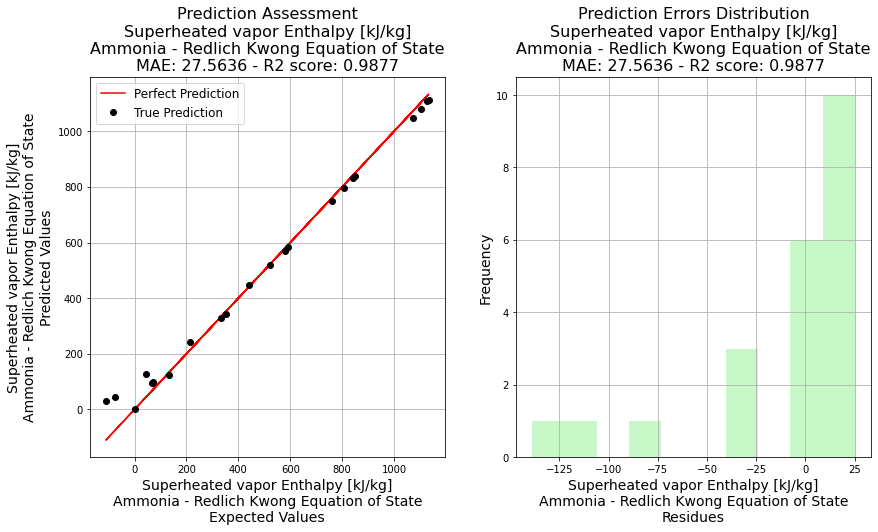

In [10]:
# plot prediction residues for enthalpy
basic.scatter_model_residues([data['deltaH'].values, data['deltaH_pred'].values], 
                             'Superheated vapor Enthalpy [kJ/kg]\nAmmonia - Redlich Kwong Equation of State')

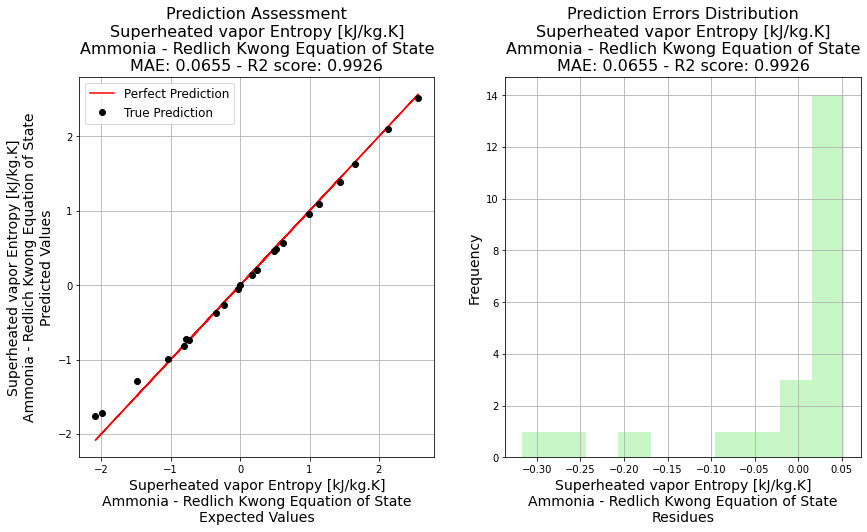

In [11]:
# plot prediction residues for entropy
basic.scatter_model_residues([data['deltaS'].values, data['deltaS_pred'].values], 
                             'Superheated vapor Entropy [kJ/kg.K]\nAmmonia - Redlich Kwong Equation of State')

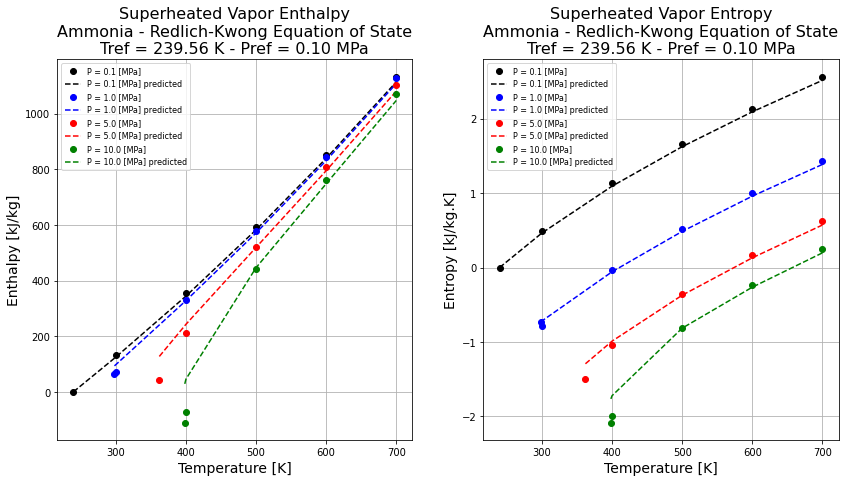

In [12]:
title = 'Ammonia - Redlich-Kwong Equation of State\nTref = %.2f K - Pref = %.2f MPa'%(T_ref, P_ref)
validation.superheated_vapor(data, title)

### 3.2. Soave-Redlich-Kwong Equation of State

In [13]:
for i in range(data.shape[0]):
    T = data.loc[i,'t']
    P = data.loc[i,'p']
    data.loc[i, 'deltaH_pred'] = (fp.superHeatVap_prop(T, P, FLUID_CODE, eos[1], 'h') - h_ref)/1000 # enthalpy in kJ/kg
    data.loc[i, 'deltaS_pred'] = (fp.superHeatVap_prop(T, P, FLUID_CODE, eos[1], 's') - s_ref)/1000 # entropy in kJ/kg.K

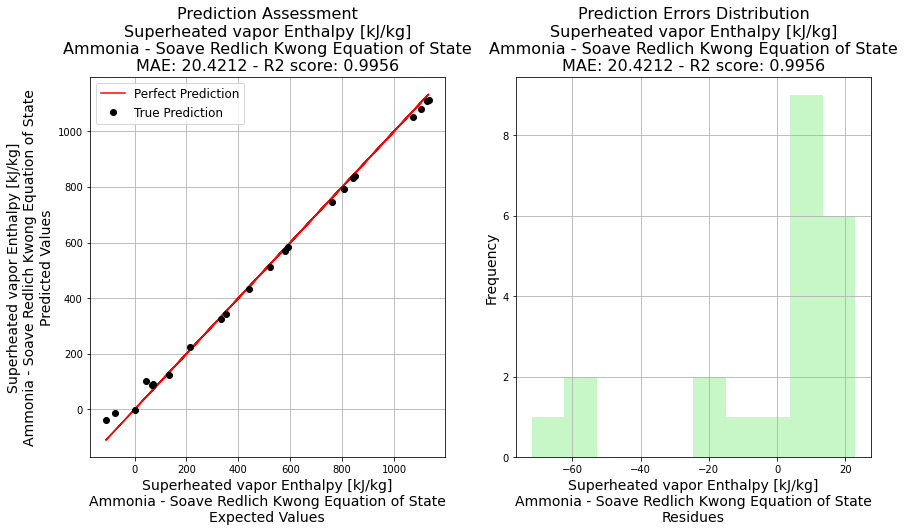

In [14]:
# plot prediction residues for enthalpy
basic.scatter_model_residues([data['deltaH'].values, data['deltaH_pred'].values], 
                             'Superheated vapor Enthalpy [kJ/kg]\nAmmonia - Soave Redlich Kwong Equation of State')

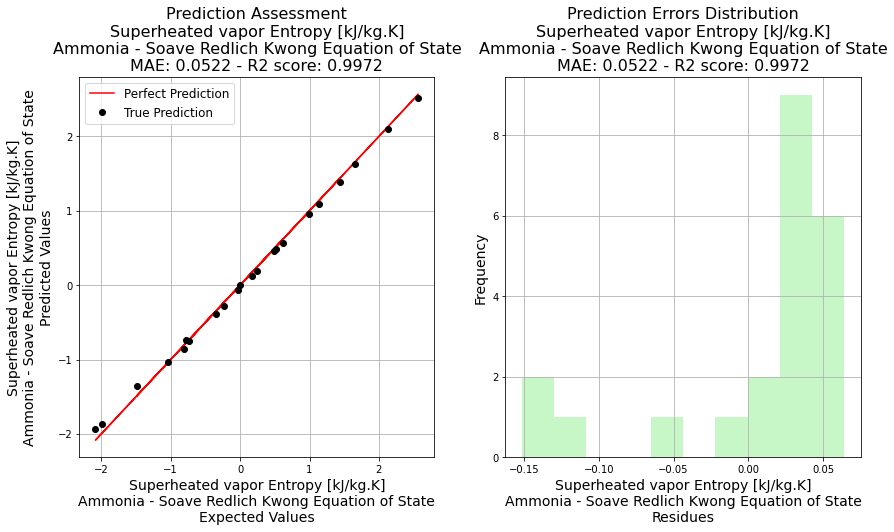

In [15]:
# plot prediction residues for entropy
basic.scatter_model_residues([data['deltaS'].values, data['deltaS_pred'].values], 
                             'Superheated vapor Entropy [kJ/kg.K]\nAmmonia - Soave Redlich Kwong Equation of State')

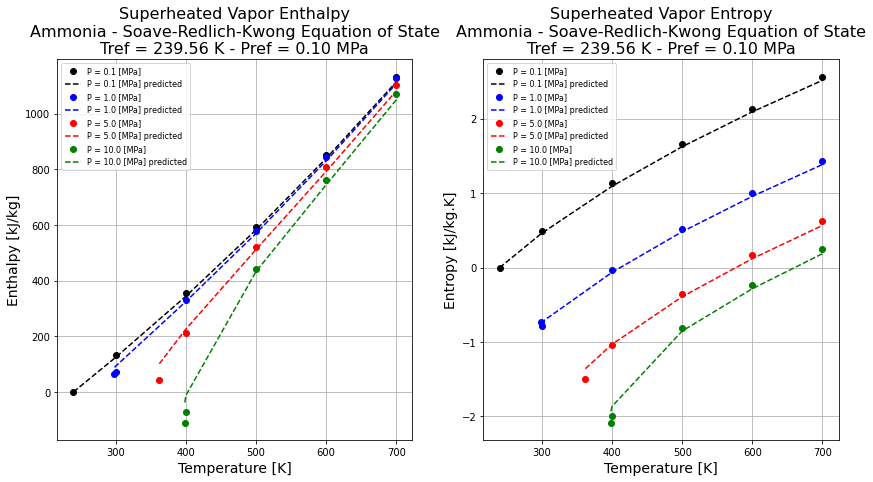

In [16]:
title = 'Ammonia - Soave-Redlich-Kwong Equation of State\nTref = %.2f K - Pref = %.2f MPa'%(T_ref, P_ref)
validation.superheated_vapor(data, title)

### 3.3. Peng-Robinson Equation of State

In [17]:
for i in range(data.shape[0]):
    T = data.loc[i,'t']
    P = data.loc[i,'p']
    data.loc[i, 'deltaH_pred'] = (fp.superHeatVap_prop(T, P, FLUID_CODE, eos[2], 'h') - h_ref)/1000 # enthalpy in kJ/kg
    data.loc[i, 'deltaS_pred'] = (fp.superHeatVap_prop(T, P, FLUID_CODE, eos[2], 's') - s_ref)/1000 # entropy in kJ/kg.K

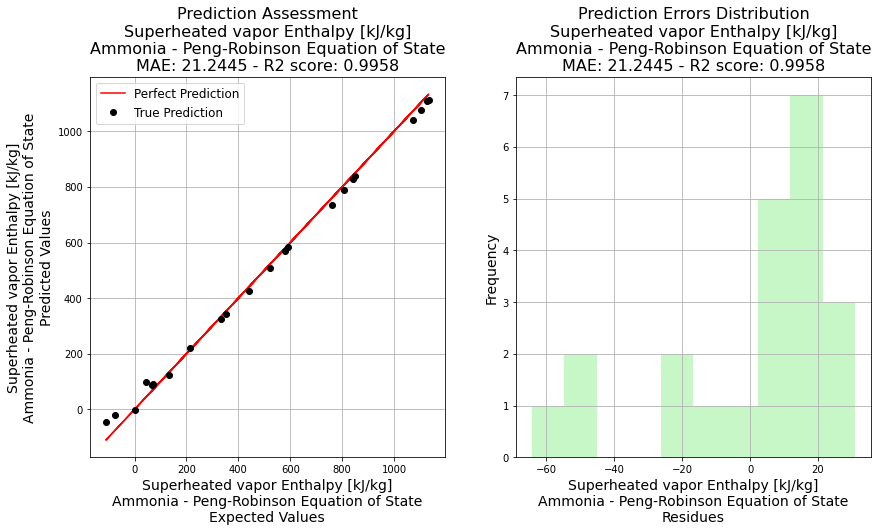

In [18]:
# plot prediction residues for enthalpy
basic.scatter_model_residues([data['deltaH'].values, data['deltaH_pred'].values], 
                             'Superheated vapor Enthalpy [kJ/kg]\nAmmonia - Peng-Robinson Equation of State')

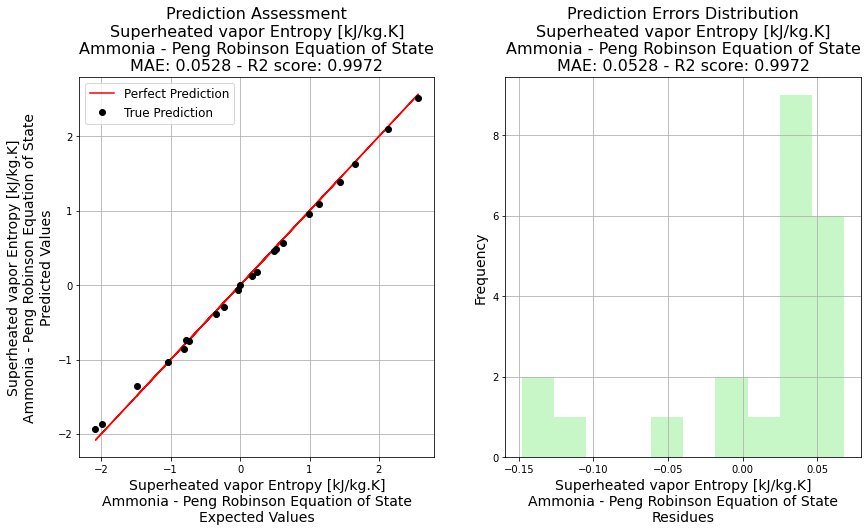

In [19]:
# plot prediction residues for entropy
basic.scatter_model_residues([data['deltaS'].values, data['deltaS_pred'].values], 
                             'Superheated vapor Entropy [kJ/kg.K]\nAmmonia - Peng Robinson Equation of State')

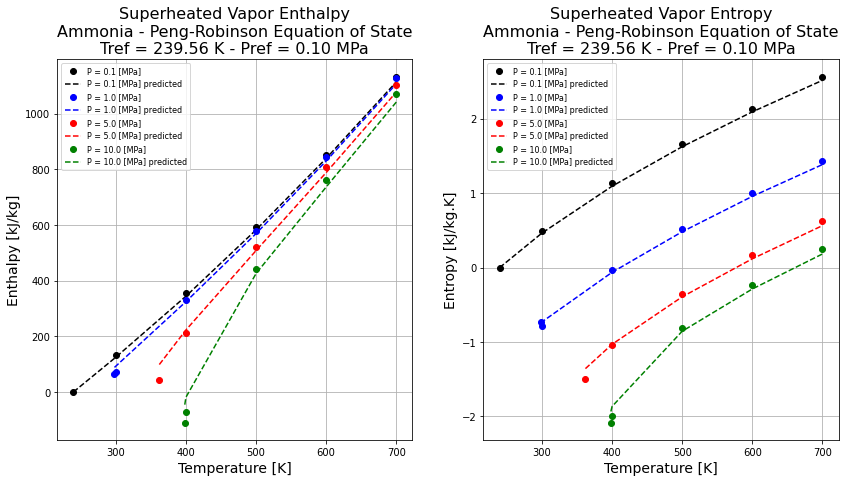

In [20]:
title = 'Ammonia - Peng-Robinson Equation of State\nTref = %.2f K - Pref = %.2f MPa'%(T_ref, P_ref)
validation.superheated_vapor(data, title)